### Prio Budi Laksono
### 210411100063
### PPW A

In [1]:
import string
import pandas as pd
import numpy as np

### Scraping website IDNtimes

In [2]:
import requests
from bs4 import BeautifulSoup
import csv

# URL dari artikel sepak bola di IDN Times
url = 'https://www.idntimes.com/sport/arena/yogama-wisnu-oktyandito/jadwal-kapolri-cup-2024-babak-8-besar-hingga-final'

# Membuat permintaan ke URL
response = requests.get(url)

# Inisialisasi data yang akan disimpan
# Mengambil ulang dan membersihkan data yang diminta
artikel_mees = []

if response.status_code == 200:
    # Parsing halaman web
    soup = BeautifulSoup(response.text, 'html.parser')
    
    # Mengambil judul artikel
    title = soup.find('h1').get_text().strip()
    
    # Mengambil tanggal publikasi artikel dan membersihkan spasi berlebih
    date = soup.find('time').get_text().strip()
    
    # Mengambil isi artikel dengan membersihkan konten tambahan
    content = soup.find_all('p')
    article_text = '\n'.join([p.get_text().strip() for p in content if p.get_text().strip()])

    # Simpan data dalam bentuk dictionary yang telah dibersihkan
    artikel_mees.append({
        'Title': title,
        'Date': date,
        'Content': article_text
    })

# Membuat dataframe dari data yang telah dibersihkan
data_mees = pd.DataFrame(artikel_mees)

# Menampilkan dataframe yang bersih
data_mees

,Title,Date,Content
0,"Jadwal Lengkap Kapolri Cup 2024, Babak 8 Besar...",10 Oct 24 | 09:52,Regional\nKategori\nEvent\nDOWNLOAD IDN APP SE...


### Mengukur Kemiripan Antar Teks

In [3]:
import re
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity

### Proses Case Folding
## Mengubah ke huruf kecil semua

In [4]:
# Proses case folding
def casefolding(Content):
    if isinstance(Content, list):
        # Jika Content adalah list, terapkan case folding pada setiap elemen
        return [str(item).lower() for item in Content]
    else:
        # Jika Content adalah string, langsung terapkan case folding
        return str(Content).lower()

# Terapkan fungsi casefolding pada kolom 'Content'
data_mees['Content'] = data_mees['Content'].apply(casefolding)

data_mees.head()

,Title,Date,Content
0,"Jadwal Lengkap Kapolri Cup 2024, Babak 8 Besar...",10 Oct 24 | 09:52,regional\nkategori\nevent\ndownload idn app se...


### menyimpan kedalam dataframe ke csv

In [5]:
csv_filename = "artikel_mees_hilgers.csv"
data_mees.to_csv(csv_filename, index=False, encoding='utf-8')

print(f"Data berita telah disimpan ke {csv_filename}")

Data berita telah disimpan ke artikel_mees_hilgers.csv


In [6]:
data_mees = pd.read_csv("artikel_mees_hilgers.csv", sep=',', encoding='latin1')
data_mees.head()

,Title,Date,Content
0,"Jadwal Lengkap Kapolri Cup 2024, Babak 8 Besar...",10 Oct 24 | 09:52,regional\nkategori\nevent\ndownload idn app se...


### cleansing content

In [7]:
def cleansing(Content):
    # Menghapus whitespace di awal dan akhir teks
    Content = Content.strip()
    
    # Menghapus tanda baca dan karakter khusus
    Content = re.sub(f"[{string.punctuation}]", '', Content)
    
    # Menghapus angka
    Content = re.sub(r'\d+', '', Content)
    
    # Menghapus huruf tunggal (opsional, tergantung kebutuhan)
    Content = re.sub(r"\b[a-zA-Z]\b", "", Content)
    
    # Menghapus karakter-karakter non-standar seperti â
    Content = re.sub(r'[^\x00-\x7F]+', '', Content)
    
    # Menghapus spasi ganda
    Content = re.sub(r'\s+', ' ', Content)
    
    return Content

# Terapkan fungsi cleansing pada kolom 'Content'
data_mees['Content'] = data_mees['Content'].apply(cleansing)

# Menampilkan 5 baris pertama
data_mees.head(5)

,Title,Date,Content
0,"Jadwal Lengkap Kapolri Cup 2024, Babak 8 Besar...",10 Oct 24 | 09:52,regional kategori event download idn app sekar...


In [8]:
import nltk
nltk.download('punkt')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\pblak\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

### Tokenisasi

In [9]:
import nltk
from nltk.tokenize import sent_tokenize, word_tokenize
import pandas as pd  # Ensure you import pandas for DataFrame usage

# Download required resources
nltk.download('punkt')
nltk.download('punkt_tab')

# Assume article_text is defined; replace with your actual text
# article_text = "Your article text goes here."

# Ekstraksi kalimat dari konten artikel
sentences = sent_tokenize(article_text)

# Tokenisasi tiap kalimat menjadi term
terms_per_sentence = [word_tokenize(sentence) for sentence in sentences]

# Membuat objek yang menyimpan hasil term dari setiap kalimat
extracted_terms = [{'Sentence': sentence, 'Terms': terms} for sentence, terms in zip(sentences, terms_per_sentence)]

# Menampilkan hasilnya sebagai dataframe
df_terms = pd.DataFrame(extracted_terms)

# Menampilkan dataframe
print(df_terms)


                                             Sentence  \
0   Regional\nKategori\nEvent\nDOWNLOAD IDN APP SE...   
1   Kapolri Cup 2024 telah memasuki babak 8 besar ...   
2   Selanjutnya, kompetisi akan dilanjutkan ke bab...   
3   Sebelumnya, sejumlah tim dari setiap provinsi ...   
4   Kini, tersisa delapan tim dari kategori putra ...   
5   Sang juara bertahan, Kalimantan Barat masih me...   
6   Berikut jadwal lengkap Kapolri Cup 2024 dari b...   
7   Pada babak 8 besar Kapolri Cup 2024, delapan t...   
8   Setiap tim akan memainkan tiga pertandingan me...   
9   Lalu, masing-masing juara dan runner up dari s...   
10  Berikut pembagian grup 8 besar Kapolri Cup 202...   
11  Kamis, 3 Oktober\nJumat, 4 Oktober\nSabtu, 5 O...   
12  Berikut jadwal semifinal Kapolri Cup 2024:\nKe...   
13  Baca Juga: Profil Yolla Yuliana, Atlet Voli Po...   
14  Masyarakat bisa menonton siaran langsungnya se...   
15  Selain itu, pencinta voli juga bisa menonton l...   
16  Berikut cara nonton Kapolri

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\pblak\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package punkt_tab to
[nltk_data]     C:\Users\pblak\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!


### menyimpan DataFrame df_terms ke dalam file CSV bernama "artikel_mees_hilgers_ekstract_term.csv" tanpa menyertakan indeks baris, dan menggunakan encoding UTF-8.

In [10]:
csv_filename = "artikel_mees_hilgers_ekstract_term.csv"
df_terms.to_csv(csv_filename, index=False, encoding='utf-8')

print(f"Data berita telah disimpan ke {csv_filename}")

Data berita telah disimpan ke artikel_mees_hilgers_ekstract_term.csv


### menghitung dan menampilkan TF-IDF

In [11]:
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from nltk.tokenize import sent_tokenize, word_tokenize

# Assuming we have the article_text
sentences = sent_tokenize(article_text)
terms_per_sentence = [word_tokenize(sentence) for sentence in sentences]
extracted_terms = [{'Sentence': sentence, 'Terms': terms} for sentence, terms in zip(sentences, terms_per_sentence)]
df_terms = pd.DataFrame(extracted_terms)

# Menggabungkan terms menjadi string untuk setiap kalimat
df_terms['Terms_String'] = df_terms['Terms'].apply(' '.join)

# Membuat TF-IDF Vectorizer
tfidf_vectorizer = TfidfVectorizer()

# Fit dan transform data
tfidf_matrix = tfidf_vectorizer.fit_transform(df_terms['Terms_String'])

# Mendapatkan nama-nama feature (terms)
feature_names = tfidf_vectorizer.get_feature_names_out()

# Membuat DataFrame untuk nilai TF-IDF
tfidf_df = pd.DataFrame(tfidf_matrix.toarray(), columns=feature_names)

# Menambahkan kolom Sentence
tfidf_df['Sentence'] = df_terms['Sentence']

# Melelehkan (melting) DataFrame untuk format yang lebih mudah dibaca
melted_tfidf = tfidf_df.melt(id_vars=['Sentence'], var_name='Term', value_name='TF-IDF')

# Menghapus baris dengan nilai TF-IDF 0
melted_tfidf = melted_tfidf[melted_tfidf['TF-IDF'] != 0]

# Mengurutkan berdasarkan nilai TF-IDF tertinggi
melted_tfidf = melted_tfidf.sort_values('TF-IDF', ascending=False)

# Menampilkan hasil
print(melted_tfidf)

                                               Sentence      Term    TF-IDF
1759  Kamis, 3 Oktober\nJumat, 4 Oktober\nSabtu, 5 O...   oktober  0.671017
1434  Lalu, masing-masing juara dan runner up dari s...    masing  0.565176
777                            Dukung tim jagoanmu, ya!    dukung  0.543508
1043                           Dukung tim jagoanmu, ya!  jagoanmu  0.543508
2791                           Dukung tim jagoanmu, ya!        ya  0.543508
...                                                 ...       ...       ...
106   Kamis, 3 Oktober\nJumat, 4 Oktober\nSabtu, 5 O...      akan  0.083347
201   Kamis, 3 Oktober\nJumat, 4 Oktober\nSabtu, 5 O...     babak  0.078224
581   Kamis, 3 Oktober\nJumat, 4 Oktober\nSabtu, 5 O...        di  0.078224
1170  Kamis, 3 Oktober\nJumat, 4 Oktober\nSabtu, 5 O...   kapolri  0.069496
486   Kamis, 3 Oktober\nJumat, 4 Oktober\nSabtu, 5 O...       cup  0.069496

[295 rows x 3 columns]


### menghitung kemiripan antar kalimat berdasarkan cosine similarity dari vektor TF-IDF setiap kalimat dalam artikel

In [14]:
import numpy as np
import pandas as pd
from scipy.spatial.distance import cosine

# Assuming we have the melted_tfidf DataFrame from the previous code
# If not, uncomment and run the previous code to get melted_tfidf

# Step 1: Pivot the melted DataFrame back to wide format
tfidf_wide = melted_tfidf.pivot(index='Sentence', columns='Term', values='TF-IDF').fillna(0)

# Step 2: Calculate cosine similarity between sentences
num_sentences = len(tfidf_wide)
adjacency_matrix = np.zeros((num_sentences, num_sentences))

for i in range(num_sentences):
    for j in range(i, num_sentences):  # We only need to calculate upper triangle
        if i == j:
            adjacency_matrix[i][j] = 1.0  # Sentence is fully similar to itself
        else:
            similarity = 1 - cosine(tfidf_wide.iloc[i], tfidf_wide.iloc[j])
            adjacency_matrix[i][j] = similarity
            adjacency_matrix[j][i] = similarity  # Matrix is symmetric

# Create a DataFrame for better visualization
adjacency_df = pd.DataFrame(adjacency_matrix, 
                            index=tfidf_wide.index, 
                            columns=tfidf_wide.index)

# Display the adjacency matrix
print("Adjacency Matrix:")
print(adjacency_df)

# Optional: You can set a threshold to consider only strong connections
threshold = 0.05
adjacency_df_thresholded = adjacency_df.where(adjacency_df > threshold, 0)

print("\nAdjacency Matrix (with threshold):")
print(adjacency_df_thresholded)

# Optional: Save to CSV
adjacency_df.to_csv('adjacency_matrix.csv')
adjacency_df_thresholded.to_csv('adjacency_matrix_thresholded.csv')

Adjacency Matrix:
Sentence                                            Baca Juga: Profil Nurlaili Kusumah, Pevoli Sekaligus TNI AL di Proliga 2024  \
Sentence                                                                                                                          
Baca Juga: Profil Nurlaili Kusumah, Pevoli Seka...                                           1.000000                             
Baca Juga: Profil Yolla Yuliana, Atlet Voli Pop...                                           0.199281                             
Berikut cara nonton Kapolri Cup 2024 di Vidio:\...                                           0.066529                             
Berikut jadwal lengkap Kapolri Cup 2024 dari ba...                                           0.029734                             
Berikut jadwal semifinal Kapolri Cup 2024:\nKem...                                           0.047483                             
Berikut pembagian grup 8 besar Kapolri Cup 2024...               

### membangun dan memvisualisasikan graf kalimat berdasarkan kemiripan (cosine similarity)

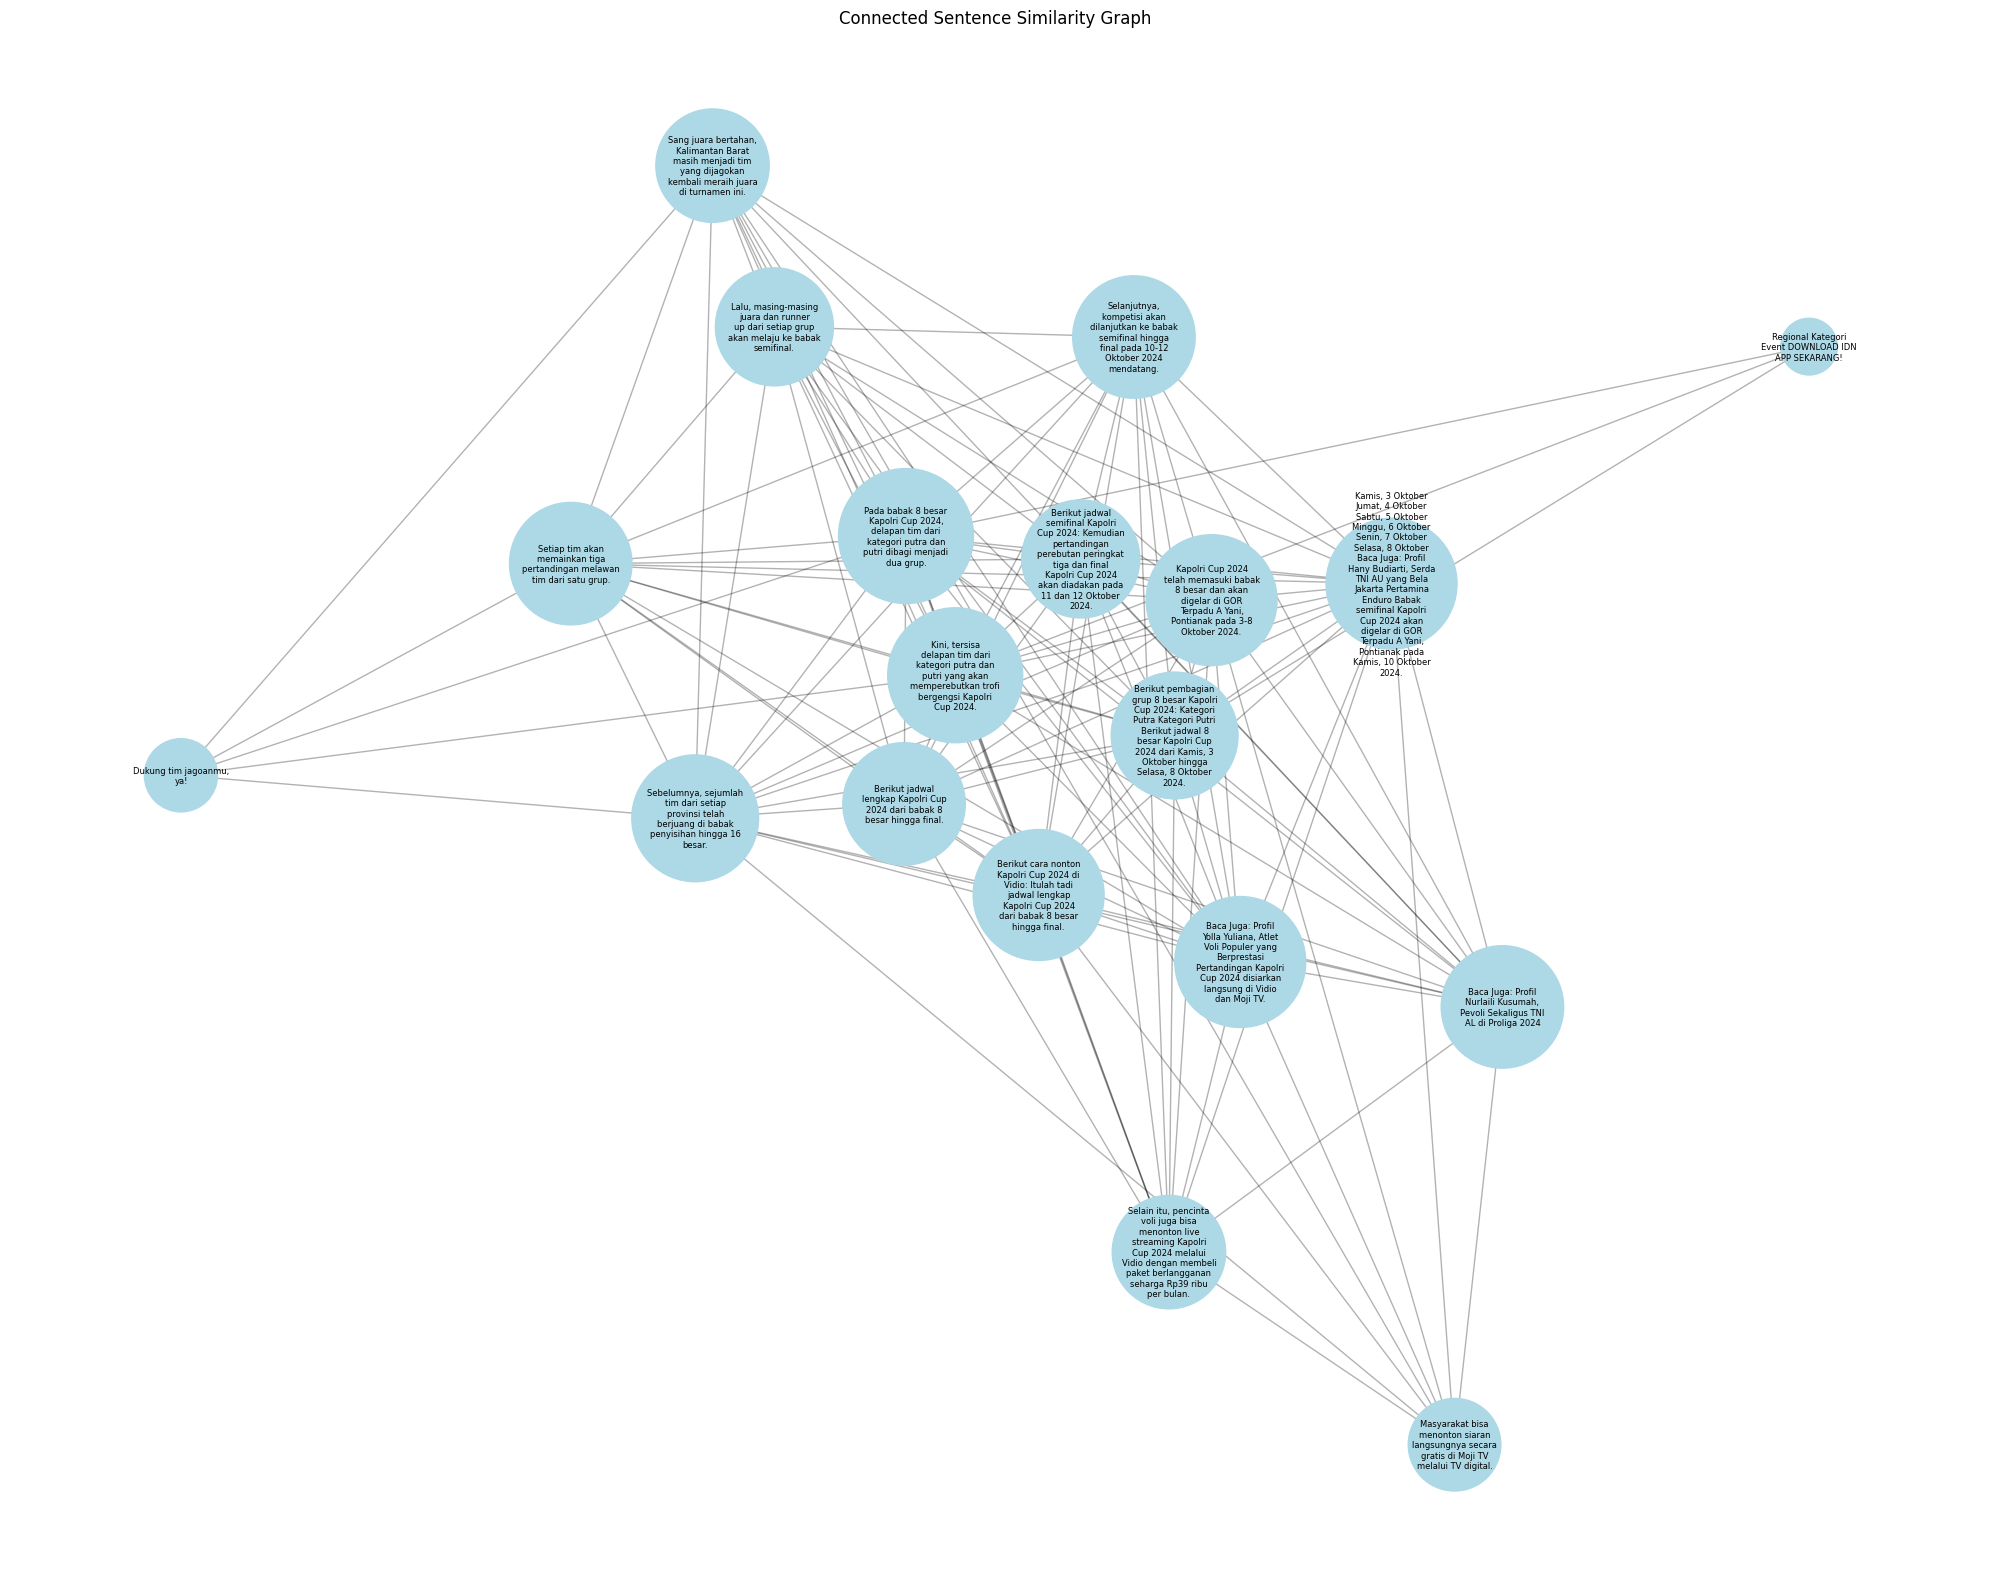

Number of nodes: 19
Number of edges: 125
Is the graph connected? True

Centrality Measures:
                                             Sentence  Degree Centrality  \
9   Kini, tersisa delapan tim dari kategori putra ...           0.944444   
12  Pada babak 8 besar Kapolri Cup 2024, delapan t...           0.944444   
1   Baca Juga: Profil Yolla Yuliana, Atlet Voli Po...           0.888889   
8   Kapolri Cup 2024 telah memasuki babak 8 besar ...           0.888889   
2   Berikut cara nonton Kapolri Cup 2024 di Vidio:...           0.888889   
7   Kamis, 3 Oktober\nJumat, 4 Oktober\nSabtu, 5 O...           0.888889   
15  Sebelumnya, sejumlah tim dari setiap provinsi ...           0.833333   
5   Berikut pembagian grup 8 besar Kapolri Cup 202...           0.833333   
0   Baca Juga: Profil Nurlaili Kusumah, Pevoli Sek...           0.777778   
3   Berikut jadwal lengkap Kapolri Cup 2024 dari b...           0.777778   
17  Selanjutnya, kompetisi akan dilanjutkan ke bab...           0.777778

In [13]:
import numpy as np
import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt
from sklearn.metrics.pairwise import cosine_similarity
import textwrap

# Assuming we have the tfidf_wide DataFrame and original sentences from previous steps
# If not, you need to run the TF-IDF calculation code first

# Calculate cosine similarity
cosine_sim = cosine_similarity(tfidf_wide)

# Create a DataFrame for the similarity matrix
similarity_df = pd.DataFrame(cosine_sim, index=tfidf_wide.index, columns=tfidf_wide.index)

# Create a graph from the similarity matrix
G = nx.from_pandas_adjacency(similarity_df)

# Remove self-loops
G.remove_edges_from(nx.selfloop_edges(G))

# Function to get the largest connected component
def get_largest_component(G):
    return max(nx.connected_components(G), key=len)

# Ensure the graph is connected
while not nx.is_connected(G):
    largest_component = get_largest_component(G)
    isolated_nodes = set(G.nodes()) - set(largest_component)
    if not isolated_nodes:
        break
    for node in isolated_nodes:
        similarities = [(other_node, similarity_df.loc[node, other_node]) 
                        for other_node in largest_component]
        most_similar_node = max(similarities, key=lambda x: x[1])[0]
        G.add_edge(node, most_similar_node)

# Function to wrap text
def wrap_text(text, width=20):
    return '\n'.join(textwrap.wrap(text, width=width))

# Prepare labels (wrapped sentences)
labels = {node: wrap_text(node) for node in G.nodes()}

# Now let's visualize the graph
plt.figure(figsize=(20, 16))  # Increased figure size
pos = nx.spring_layout(G, k=0.5, iterations=50)

# Calculate node sizes based on degree centrality
degree_centrality = nx.degree_centrality(G)
node_sizes = [v * 10000 for v in degree_centrality.values()]  # Increased node sizes

# Draw the graph
nx.draw_networkx_nodes(G, pos, node_size=node_sizes, node_color='lightblue')
nx.draw_networkx_edges(G, pos, alpha=0.3)

# Add labels
nx.draw_networkx_labels(G, pos, labels, font_size=6)  # Reduced font size

plt.title("Connected Sentence Similarity Graph")
plt.axis('off')
plt.tight_layout()

# Save the graph as an image
plt.savefig('connected_sentence_similarity_graph.png', dpi=300, bbox_inches='tight')

# Show the plot
plt.show()

# Print some information about the graph
print(f"Number of nodes: {G.number_of_nodes()}")
print(f"Number of edges: {G.number_of_edges()}")
print(f"Is the graph connected? {nx.is_connected(G)}")

# Calculate centrality measures
closeness_centrality = nx.closeness_centrality(G)
betweenness_centrality = nx.betweenness_centrality(G)

# Create a DataFrame with centrality measures
centrality_data = []
for node in G.nodes():
    centrality_data.append({
        'Sentence': node,
        'Degree Centrality': degree_centrality[node],
        'Closeness Centrality': closeness_centrality[node],
        'Betweenness Centrality': betweenness_centrality[node]
    })

centrality_df = pd.DataFrame(centrality_data)

# Sort by Degree Centrality
centrality_df = centrality_df.sort_values('Degree Centrality', ascending=False)

print("\nCentrality Measures:")
print(centrality_df)

# Save centrality measures to CSV
centrality_df.to_csv('centrality_measures_with_sentences.csv', index=False)

# Optionally, print the top 5 sentences by each centrality measure
print("\nTop 5 sentences by Degree Centrality:")
print(centrality_df.nlargest(5, 'Degree Centrality')[['Sentence', 'Degree Centrality']])

print("\nTop 5 sentences by Closeness Centrality:")
print(centrality_df.nlargest(5, 'Closeness Centrality')[['Sentence', 'Closeness Centrality']])

print("\nTop 5 sentences by Betweenness Centrality:")
print(centrality_df.nlargest(5, 'Betweenness Centrality')[['Sentence', 'Betweenness Centrality']])